# Fandango Rating Analysis Project

The goal of this project is to analyze inconsistencies in the movie ratings of the [Fandango website](https://www.fandango.com/).

These were first brought to the public's attention in October of 2015 by Walt Hickney in [this](https://fivethirtyeight.com/features/fandango-movies-ratings/) article.

When compared to the actual scores that can be found in the HTML code of the site, the ratings have in the past been skewed towards higher ratings. For example a rating of 4.1 will be rounded to 4.5 instead of 4.0. Fandango claimed that this was unintentional and caused by a bug. To find out if the inconsistencies have been fixed, movie ratings in the year after they were discovered will be analyzed.
These errors are interesting since Fandango would benefit from higher ratings because they sell tickets to these movies directly on their website and higher rated movies sell more tickets.

The main focus of this project in on statistical analysis.

# Setup

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [2]:
# Read in the Datasets
ratings_old = pd.read_csv('fandango_score_comparison.csv')
ratings_new = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
fandango_old = ratings_old[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue',
                          'Fandango_votes', 'Fandango_Difference']]
fandango_new = ratings_new[['movie','year', 'fandango']]
    

# Data Analysis

In [4]:
fandango_old.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [5]:
fandango_new.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


## Datasets

The two datasets that will be used in this analysis are `fandango_old` and `fandango_new`.

* `fandango_old` is a dataset containing the data used by Walt Hickney to gather evidence for his article. It contains data on movies in 2015.
* `fandango_new` is a second dataset containing newer data from movies and their ratings in the year 2016

## Goal

The goal of the project is to find out if there is a significant difference between the Fandango rating system before and after the article in October of 2015.

## Population

In statistics, the set of all individuals relevant to the statistical question to be answered. In this case it is the total of all movies with ratings on the Fandango website.

## Sampling

To answer the question posed in the goal of this analysis, two samples have to be taken:
1. One sample prior to Hickey's article
2. One sample after the article

These are available in form of the two different datasets:


* `fandango_old`: a sample taken by Hickey, who originally investigated inconsistencies with the Fandango rating system. He excluded movies:
    * That had less than 30 user ratings on Fandango by the time of the sampling (24.08.2015)
    * That did not have ticket sales in 2015
    --> By doing this he excluded a lot of movies, especially less popular ones.
    
* a later sample. This sample excluded movies:
    * released before 2016
    * without a lot of reviews (exact number unclear)

This means:
Our two samples are:
* Not representative of the whole population. This is due to the fact that each author chose to eliminate a considerable amount of movie ratings. This will skew our results.
* Not comparable to each other. Since the people responsible for the two samplings used different criteria to exclude data, the two datasets will likely have differing results.
* Not randomized

## New goals:

Since the sampled data is neither representative nor are the two datasets comparable, we will need to re-evaluate our initial goal setting.
As a large part of the less popular movies have been excluded, out new population will be comprised only on popular movies. In fact we will be working with two populations:
* popular movies in the first 8 months of 2015
* popular movies in 2016 or later

To be able to compare the two results, we have to try to exclude all movies that would have been excluded in the sampling with the stricter sampling rules.

The goal will still be to find out if there has been a shift in the Fandango movie review aggregation process before and after the investigation, but due to these constraints we will be limiting ourselves to the more popular movies

## Overview over the data contained in our datasets

Finding out which type of movies were selected:

count      146.000000
mean      3848.787671
std       6357.778617
min         35.000000
25%        222.250000
50%       1446.000000
75%       4439.500000
max      34846.000000
Name: Fandango_votes, dtype: float64


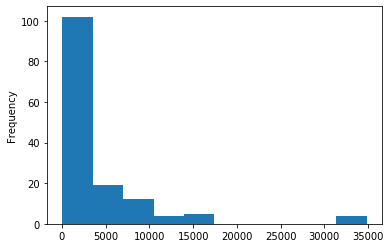

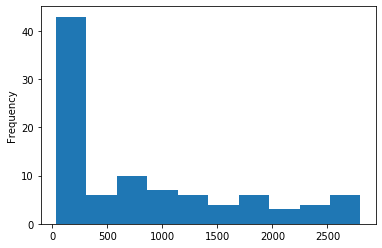

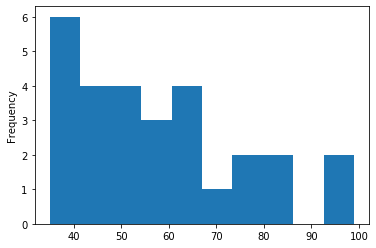

In [6]:
print(fandango_old.Fandango_votes.describe())
fandango_old.Fandango_votes.plot.hist()
plt.show()
fandango_old.Fandango_votes[fandango_old.Fandango_votes < 3000].plot.hist()
plt.show()
fandango_old.Fandango_votes[fandango_old.Fandango_votes < 100].plot.hist()
plt.show()



This means the lowest amount of ratings in the dataset containing movies from 2015 is 35. The table shows that half of our movies are rated less than 1500 times.

### New dataset

In our second dataset the movie ratings are selected by including only popular movies. The new dataset unfortunately has no equivalent to the fandango_ratings column, so we have no clear sense of what the author judged to be 'popular'. We could find a number of movies and check them manually

In [7]:
fandango_new.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


When checking the amount of ratings in the current day (October 2019) there was a tool tip on the site saying that the 5 star rating of Fandango was replaced by ratings taken from [Rotten Tomatoes](https://www.rottentomatoes.com/). This could imply that the company wasn't able to move past the controversy caused by their ratings system. It also doesn't allow generating current data by looking up current rating numbers of movies. But the movies in this project are at this point (2019) already 3 years old, so the current rating numbers would not be the most useful gauge of popularity. For this reason, the rating numbers provided by DataQuest will be used:

|Movie                                  |   # User Ratings|
|:-------------------------------------:|----------------:|
|Mechanic: Resurrection                 |             2247|
|Warcraft                               |             7271|
|Max Steel                              |              493|
|Me Before You                          |             5263|
|Fantastic Beasts and Where to Find Them|            13400|
|Cell                                   |               17|
|Genius                                 |              127|
|Sully                                  |            11877|
|A Hologram for the King                |              500|
|Captain America: Civil War             |            35057|



The majority of movies in this sampling are very popular. One outlier is present, however: Cell with only 17 ratings. This means that the inclusion criterion for the second dataset isn't how many user ratings a movie received.

## Exclude movies not released in 2015 or 2016

Included in the datasets are movies not released in 2015 or 2016. These need to be excluded.

In [8]:
# Finding the movies released in 2015 in the old Fandango dataset

fandango_2015 = fandango_old.loc[fandango_old.FILM.str.contains('\(2015\)')]
print(fandango_2015.shape)

(129, 5)


In [9]:
fandango_2016 = fandango_new[fandango_new.year == 2016]

## Comparing kernel density estimations of ratings in 2015 and 2016

Kernel density estimation plots are similar to smoothed histograms, they give a good understanding over the frequency with which different values or ranges of values appear in a dataset in a less cluttered visual representation.

In [10]:
fandango_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


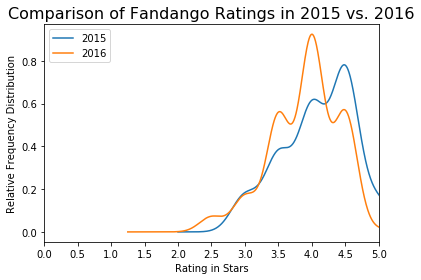

In [11]:
fandango_2015.Fandango_Stars.plot.kde(label = '2015')
fandango_2016.fandango.plot.kde(label = '2016')
plt.xlim(0,5)
plt.title('Comparison of Fandango Ratings in 2015 vs. 2016', fontsize = 16)
plt.legend(loc = 2)
plt.xlabel('Rating in Stars')
plt.ylabel('Relative Frequency Distribution')
plt.xticks(0.5*np.arange(11))
plt.style.use('fivethirtyeight')
plt.show()

## Analysis of the kernel density distributions

In general the most common rating has shifted from 4.5 to 4. So it seems Fandango has reacted to the allegation of shifting the ratings or they have taken care of their bug. The lower ratings all have a higher frequency in the 2016 dataset than in the 2015. The only exception is the three star rating which has remained the same.
In general both frequency distributions are shifted to the right, but this is at least somewhat typical, as people tend to give even bad movies a three star rating in a lot of cases. But of course shifting ratings is in favor of Fandago, because they sell tickets. It would be interesting to compare Fandangos left-shift to that of other websites, that don't sell tickets.

In [12]:
# Comparing the relative frequency tables (the datasets have different numbers of ratings)
print('Rating Distribution 2015: \n')
print(fandango_2015.Fandango_Stars.value_counts(normalize = True).sort_index()*100)
print('\n\n'+'Rating Distribution 2016:\n')
print(fandango_2016.fandango.value_counts(normalize = True).sort_index()*100)

Rating Distribution 2015: 

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64


Rating Distribution 2016:

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


## Analysis frequency Tables

Several things stick out when we compare the two frequency distributions:

* The frequency distribution in 2016 has 2.5 star ratings. In 2015 the lowest rating was a 3 star rating.
* In general a trend towards lower ratings is apparent, but it is not as clear as it was in the kernel density estimations.
 *The very high ratings are much less common in 2016, however.

### Comparing different statistics from the two years of movie ratings

In [13]:
print('Mean of Ratings'+ '\n\n 2015:')
print(fandango_2015.Fandango_Stars.mean())
print('\n'+'2016:')
print(fandango_2016.fandango.mean())

print('\n\n''Median of Ratings'+ '\n\n 2015:')
print(fandango_2015.Fandango_Stars.median())
print('\n'+'2016:')
print(fandango_2016.fandango.median())

print('\n\n''Mode of Ratings'+ '\n\n 2015:')
print(fandango_2015.Fandango_Stars.mode()[0])
print('\n'+'2016:')
print(fandango_2016.fandango.mode()[0])



Mean of Ratings

 2015:
4.0852713178294575

2016:
3.887434554973822


Median of Ratings

 2015:
4.0

2016:
4.0


Mode of Ratings

 2015:
4.5

2016:
4.0


We can see that the mean and mode have decreased, while the median has remained the same.

In [14]:
mean_2015 = fandango_2015.Fandango_Stars.mean()
median_2015 = fandango_2015.Fandango_Stars.median()
mode_2015 = fandango_2015.Fandango_Stars.mode()[0]

mean_2016 = fandango_2016.fandango.mean()
median_2016 = fandango_2016.fandango.median()
mode_2016 = fandango_2016.fandango.mode()[0]

statistics_df = pd.DataFrame()
statistics_df[2015] = [mean_2015, median_2015, mode_2015]
statistics_df[2016] = [mean_2016, median_2016, mode_2016]



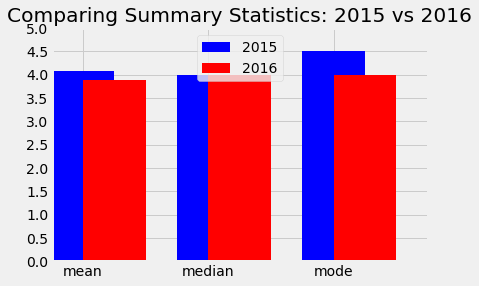

In [15]:
statistics_df[2015].plot.bar(color = 'b', align = 'center', label = '2015')
statistics_df[2016].plot.bar(color = 'r', align = 'edge', label = '2016')
plt.legend(loc = 'upper center', fontsize = 14)
plt.ylim(0,5)
plt.xticks([0,1,2], ['mean', 'median', 'mode'], rotation = 0, fontsize = 14)
plt.yticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], fontsize = 14)
plt.title('Comparing Summary Statistics: 2015 vs 2016')
plt.style.use('fivethirtyeight')
plt.show()

# Conclusions

In this analysis we have seen, that after attention was drawn to inconsistencies in movie ratings on Fandango, the ratings were on average reduced. This could be due to a fix in the system or due to Fandango trying to regain its credibility as a ratings platform. If it was the latter, this has ultimately failed, because as of the making of this analysis Fandango has replaced its own rating system with that of Rotten Tomatoes.